## Neutron filters examples

In this example we will calculate cross-sections and neutron transmission through various polycrystalline and single-crystal filters and make comparisons to experimental data. Additional information on neutron filters can be found in Ref. [1].

[1] Freund, Andreas K. "Cross-sections of materials used as neutron monochromators and filters." Nuclear Instruments and Methods in Physics Research 213, no. 2-3 (1983): 495-501. https://doi.org/10.1016/0167-5087(83)90447-7

## Preamble
Install dependencies and prepare plots. Feel free to edit as you wish:

In [1]:
#By default we only do pip installs on Google Colab, but you
#can set the variable in the next line to True if you need it:
always_do_pip_installs = False
try:
    import google.colab as google_colab
except ModuleNotFoundError:
    google_colab=None#not on google colab
if always_do_pip_installs or google_colab:
    from importlib.util import find_spec as _fs
    if not _fs('NCrystal'):
        %pip -q install ncrystal ipympl numpy pandas matplotlib
#enable inline and interactive matplotlib plots:
if google_colab:
    google_colab.output.enable_custom_widget_manager()
%matplotlib ipympl
import matplotlib
matplotlib.rcParams.update({"figure.autolayout": True})
#always import NCrystal:
import NCrystal as NC
assert NC.version_num >=  3009006, "too old NCrystal found"
NC.test() #< quick unit test that installation works

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 21.5 MB/s eta 0:00:00
Tests completed succesfully


### Additional modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Example #1

Compute the total cross-section for polycrystalline beryllium at 293 K.

Text(0, 0.5, 'Micro total cross section [b/atom]')

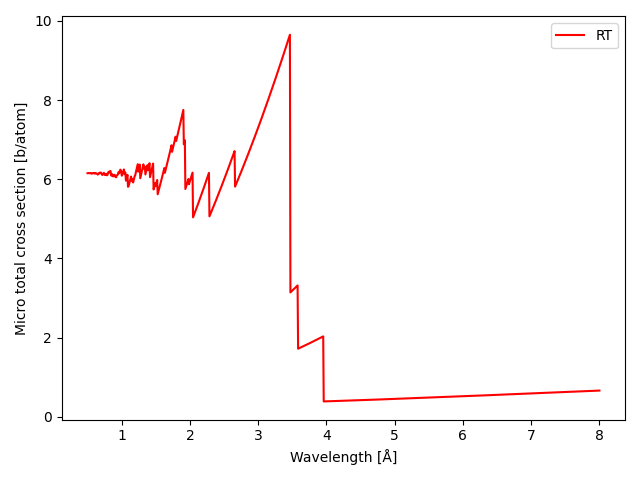

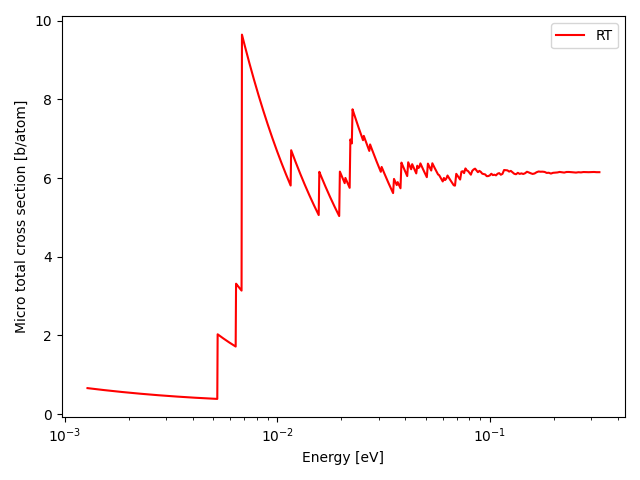

In [3]:
wl = np.linspace(0.5, 8, 1000)

cfg1 = 'Be_sg194.ncmat;temp=293K'

mat1 = NC.load(cfg1)
xs1 = mat1.scatter.xsect(wl=wl)+mat1.absorption.xsect(wl=wl)

plt.figure()
plt.plot(wl, xs1, 'r-', label='RT')
plt.legend()
plt.xlabel('Wavelength [Å]')
plt.ylabel('Micro total cross section [b/atom]')

plt.figure()
E = NC.wl2ekin(wl)
xs1 = mat1.scatter.xsect(E)+mat1.absorption.xsect(E)
plt.semilogx(E, xs1, 'r-', label='RT')
plt.legend()
plt.xlabel('Energy [eV]')
plt.ylabel('Micro total cross section [b/atom]')


## Exercise #1

Compute the cross-sections for polycrystalline beryllium at 30 K, 80 K and 293 K and for single-crystal beryllium at 30 K.

In [4]:
## Your code

## Example #2

Compute the transmission through a 20 cm thick polycrystalline Be filter at 293 K.

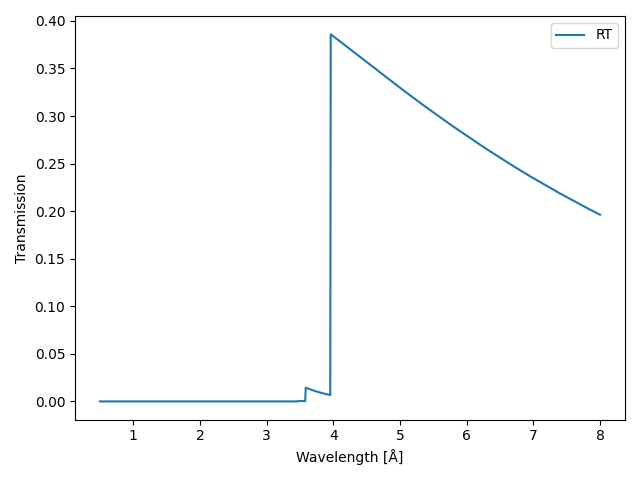

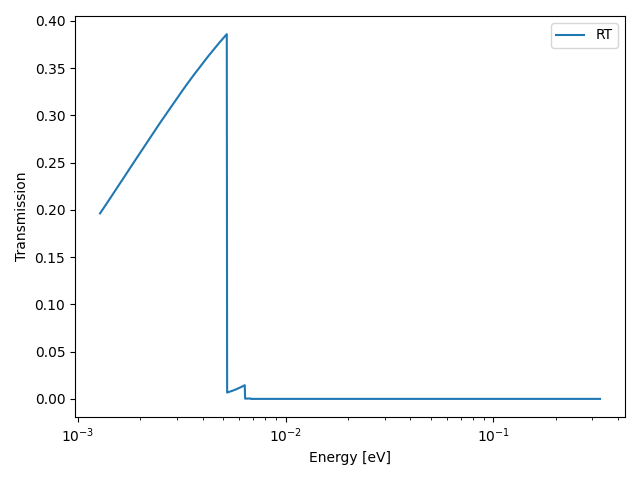

In [5]:
filter_thickness = 20 # cm

N1 = mat1.info.getNumberDensity()

plt.figure()
plt.plot(wl,np.exp(-N1*xs1*filter_thickness), label='RT')
plt.xlabel('Wavelength [Å]')
plt.ylabel('Transmission')
a = plt.legend()

plt.figure()
plt.semilogx(E,np.exp(-N1*xs1*filter_thickness), label='RT')
plt.xlabel('Energy [eV]')
plt.ylabel('Transmission')
a = plt.legend()

## Exercise #2

Compute transmissions for other materials.

In [6]:
## Your code

## Exercise #3

Compare the total cross section data for different filters with experimental data from the IAEA database [EXFOR](https://www-nds.iaea.org/exfor/). We will access the experimental data using the [Web API](https://www-nds.iaea.org/exfor/x4guide/API/).

Modify this cell to compare the experimental data with NCrystal results.

Text(0, 0.5, 'Cross-section (b per atom)')

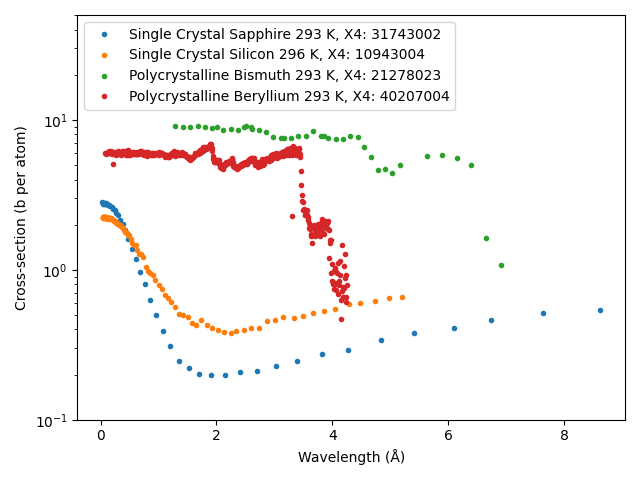

In [7]:
from urllib.request import urlopen, Request
import pandas as pd
import io
x4ids = [31743002,10943004, 21278023,40207004]
x4label = ['Single Crystal Sapphire 293 K','Single Crystal Silicon 296 K','Polycrystalline Bismuth 293 K','Polycrystalline Beryllium 293 K']

fig, ax = plt.subplots()

#for x4id in x4ids:
for i, x4id in enumerate(x4ids):
    req = Request(
        url=f'https://nds.iaea.org/exfor/x4get?DatasetID={x4id}&op=csv',
        data=None,
        headers={
            'User-Agent': 'Mozilla/5.0 (X11; Fedora; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
        }
    )
    with urlopen(req) as f:
        df = pd.read_csv(io.StringIO(f.read().decode('utf-8')))
    if 'EN (EV) 1.1' in list(df):
        x4_E, x4_xs = df['EN (EV) 1.1'].values, df['DATA (B) 0.1'].values
    elif 'EN (MEV) 1.1' in list(df):
        x4_E, x4_xs = 1e6*df['EN (MEV) 1.1'].values, df['DATA (B) 0.1'].values

    if (i==0):
      ax.plot(NC.ekin2wl(x4_E), x4_xs/5.0, '.', label=x4label[i]+ f', X4: {x4id}')
    else:
      ax.plot(NC.ekin2wl(x4_E), x4_xs, '.', label=x4label[i]+ f', X4: {x4id}')

ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_ylim(0.1,50)
ax.set_xlabel("Wavelength (Å)")
ax.set_ylabel("Cross-section (b per atom)")
